<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/log-reg/LogReg_with_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt

# Creating a Dataset

In [33]:
X, y = make_classification(n_samples=2000, n_features=20, n_informative=19, n_redundant=1, n_classes=2, random_state=42)
X.shape

(2000, 20)

In [34]:
np.unique(y)

array([0, 1])

# Standardize the train Data

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Train LogReg

In [36]:
logreg = LogisticRegression()
LR = logreg.fit(X, y)

In [37]:
X_test, y_test = make_classification(n_samples=400, n_features=20, n_informative=19, n_redundant=1, n_classes=2, random_state=42)
X_test.shape

(400, 20)

In [38]:
X_test = sc.fit_transform(X_test)

# Prediction from Test Data

In [39]:
y_pred = LR.predict(X_test)

# Classification Report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.49      0.51       200
           1       0.51      0.54      0.52       200

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.51       400
weighted avg       0.52      0.52      0.51       400



# Confusion matrixx

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 99 101]
 [ 93 107]]


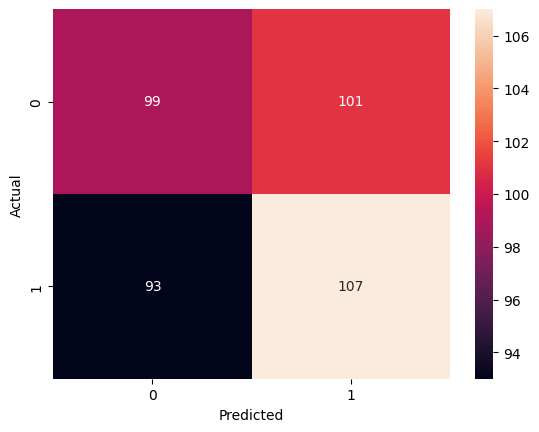

In [42]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting ROC curve

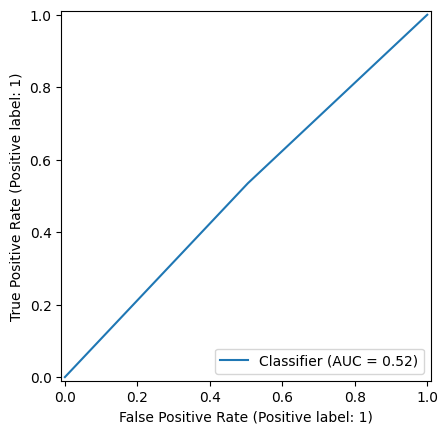

In [44]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(1,1)
RocCurveDisplay.from_predictions(y_test, y_pred, drop_intermediate=False, ax=ax)
plt.show()


# Using Cross Validation fro LogReg

In [46]:
k = 5
cv = KFold(n_splits=k, random_state=42, shuffle=True)

scores = cross_val_score(logreg, X, y,scoring='accuracy', cv=cv)
print(f"Accuracy: {np.mean(scores):.3f}")

Accuracy: 0.832


## Prediction

In [47]:
y_pred_cv = cross_val_predict(logreg, X_test, y_test, cv=cv)

## Accuracy improved

In [48]:
Accuracy = np.mean(y_pred_cv == y_test)
print(f"Accuracy: {Accuracy:.3f}")

Accuracy: 0.777


## Confusion matrix

In [49]:
cm = confusion_matrix(y_test, y_pred_cv)


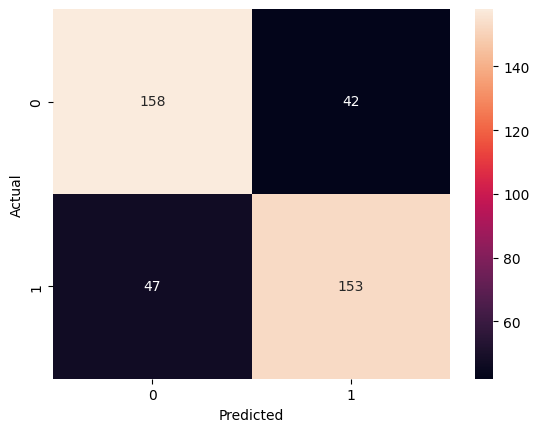

In [50]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Classification Report

In [51]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       200
           1       0.78      0.77      0.77       200

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



## ROC Curve

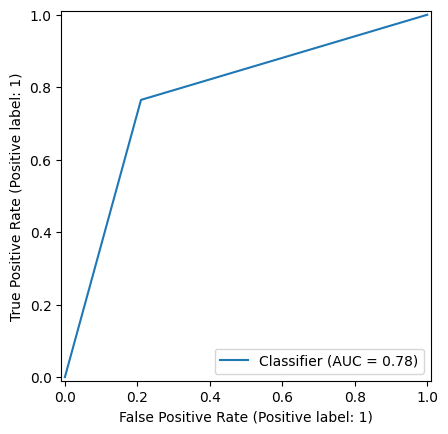

In [52]:
fig, ax = plt.subplots(1,1)
RocCurveDisplay.from_predictions(y_test, y_pred_cv, drop_intermediate=False, ax=ax)
plt.show()